In [11]:
!pip install numpy


In [282]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv('Datasets/day.csv')

In [13]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Distribution of Year

In [18]:
year_count=data['yr'].value_counts()
year_count

yr
1    366
0    365
Name: count, dtype: int64

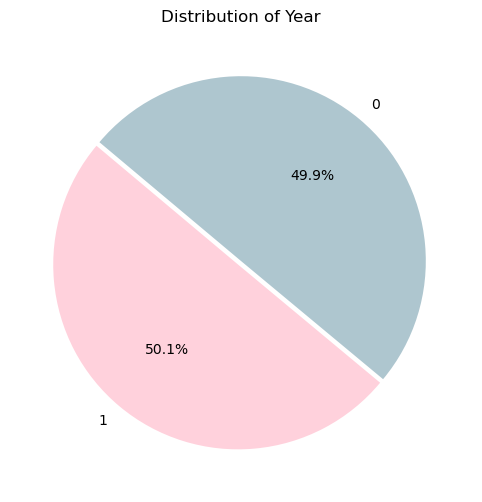

In [88]:
plt.figure(figsize=(8, 6))
plt.pie(year_count, labels=year_count.index, autopct='%1.1f%%', 
        startangle=140, explode=(0.025, 0),colors=['#FFD1DC', '#AEC6CF','#FDFD96'])
plt.title('Distribution of Year')
plt.show()

## Month Wise Distribution

In [23]:
year_month=data['mnth'].value_counts()
year_month

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64

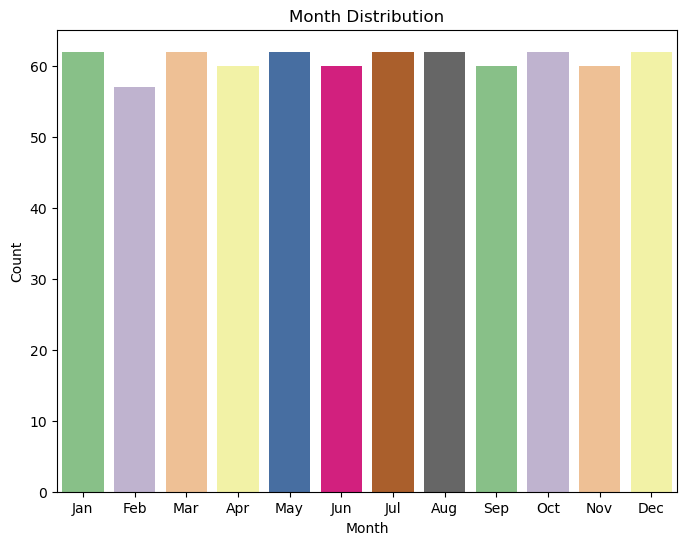

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='mnth', data=data,hue='mnth', palette='Accent', dodge=False,legend=False) 


plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

## When the sale is high (holiday\non holiday)

In [28]:
holiday_count=data['holiday'].value_counts()
holiday_count

holiday
0    710
1     21
Name: count, dtype: int64

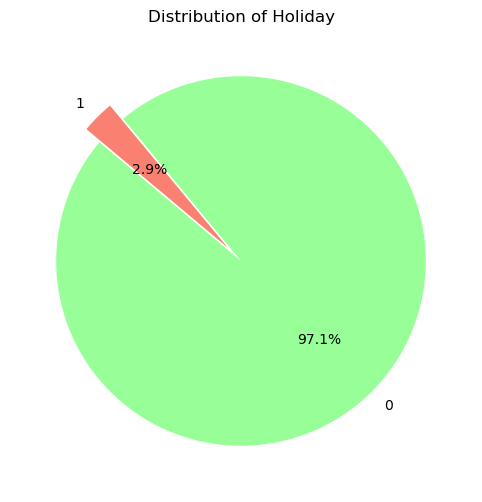

In [97]:
plt.figure(figsize=(8, 6))
plt.pie(holiday_count, labels=holiday_count.index, autopct='%1.1f%%', 
        startangle=140, explode=(0, 0.1),colors=['#98FF98','salmon'])
plt.title('Distribution of Holiday')
plt.show()

### Is there a correlation between temperature (temp, atemp) and the number of bike rentals?

In [33]:
# Correlation calculation
correlation_matrix = data[['temp', 'atemp', 'cnt']].corr()
correlation_matrix


,temp,atemp,cnt
temp,1.000000,0.991702,0.627494
atemp,0.991702,1.000000,0.631066
cnt,0.627494,0.631066,1.000000


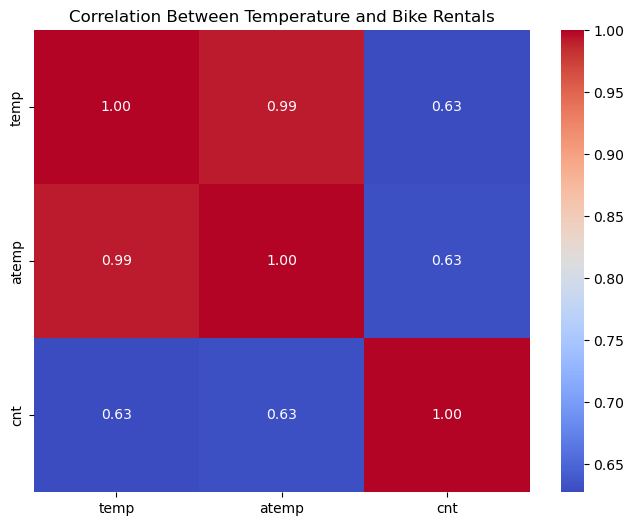

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Temperature and Bike Rentals')
plt.show()


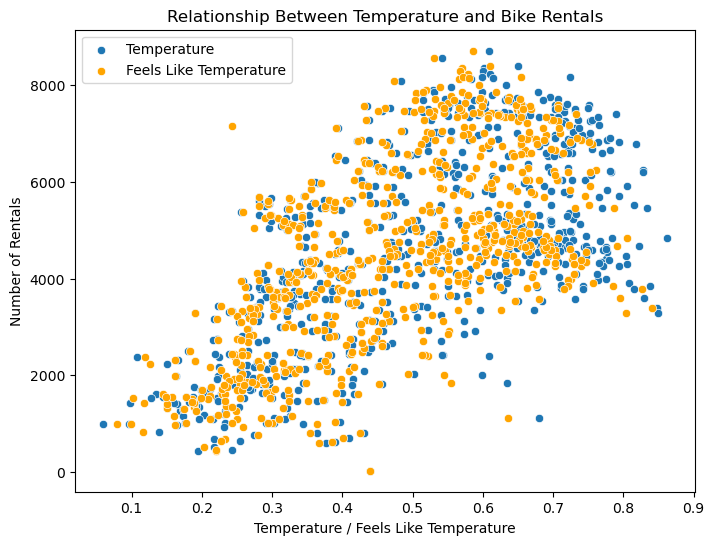

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=data, label='Temperature')
sns.scatterplot(x='atemp', y='cnt', data=data, label='Feels Like Temperature', color='orange')
plt.title('Relationship Between Temperature and Bike Rentals')
plt.xlabel('Temperature / Feels Like Temperature')
plt.ylabel('Number of Rentals')
plt.legend()
plt.show()

### How do casual (casual) and registered (registered) users contribute to total rentals (cnt)?

In [40]:
# Create a new column for casual and registered contribution to total rentals
data['casual_percentage'] = data['casual'] / data['cnt'] * 100
data['registered_percentage'] = data['registered'] / data['cnt'] * 100

# Summarize the total contributions of casual and registered users
total_casual_contribution = data['casual'].sum()
total_registered_contribution = data['registered'].sum()

print("Total Casual Users Contribution:", total_casual_contribution)
print("Total Registered Users Contribution:", total_registered_contribution)


Total Casual Users Contribution: 620017
Total Registered Users Contribution: 2672662


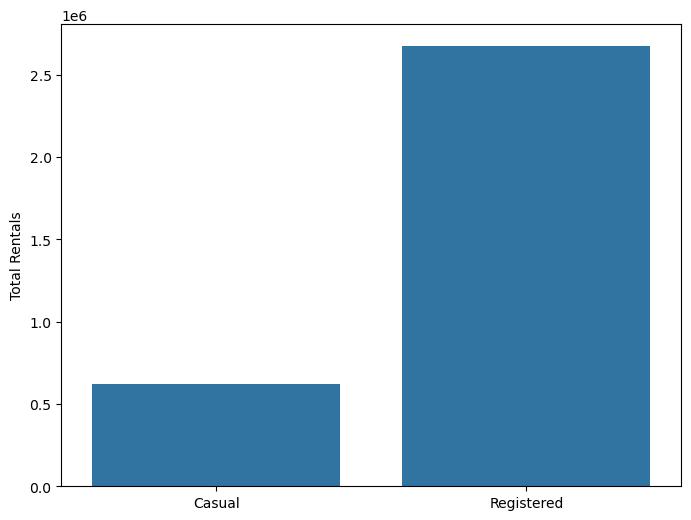

In [42]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Casual', 'Registered'], y=[total_casual_contribution, total_registered_contribution])
plt.ylabel('Total Rentals')
plt.show()

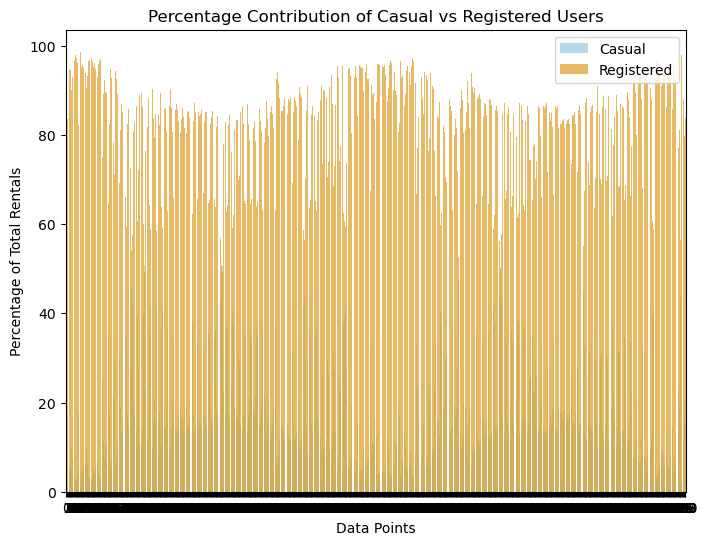

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y='casual_percentage', data=data, color='skyblue', label='Casual', alpha=0.7)
sns.barplot(x=data.index, y='registered_percentage', data=data, color='orange', label='Registered', alpha=0.7)
plt.title('Percentage Contribution of Casual vs Registered Users')
plt.ylabel('Percentage of Total Rentals')
plt.xlabel('Data Points')
plt.legend()
plt.show()

### How does the number of rentals vary across seasons 

In [51]:
# Converting 'dteday' to datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Map numeric seasons to season names (if needed)
#season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
#data['season'] = data['season'].map(season_map)

seasonal_rentals = data.groupby('season')['cnt'].sum()
seasonal_rentals

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

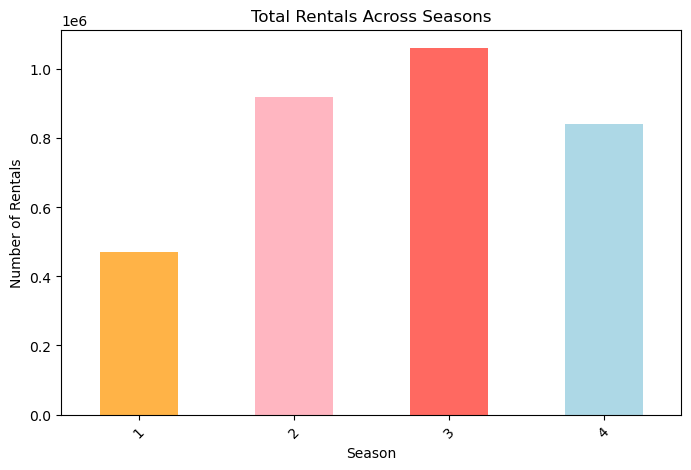

In [52]:
plt.figure(figsize=(8, 5))

seasonal_rentals.plot(kind='bar', color=['#FFB347', '#FFB6C1', '#FF6961', '#ADD8E6'])

plt.title('Total Rentals Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.show()

## How does bike rental activity change across different years (yr)?


In [54]:
yearly_rentals = data.groupby('yr')['cnt'].sum()
yearly_rentals

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

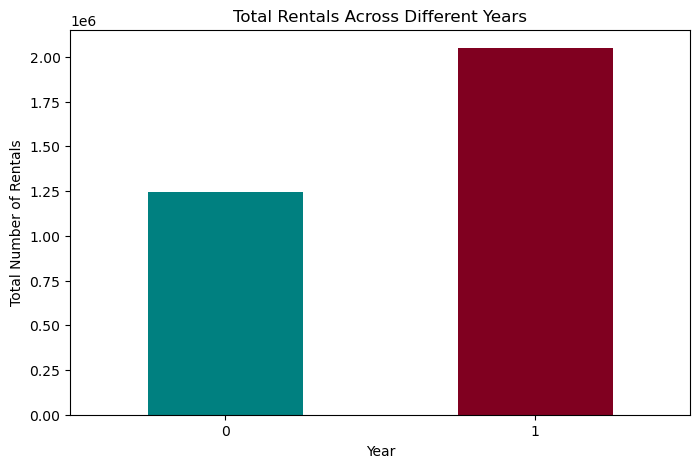

In [55]:
plt.figure(figsize=(8, 5))
yearly_rentals.plot(kind='bar', color=['#008080', '#800020'])  
plt.title('Total Rentals Across Different Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Rentals')
plt.xticks(rotation=0)
plt.show()

###  Box Plot for Weekday vs. Rentals (cnt)

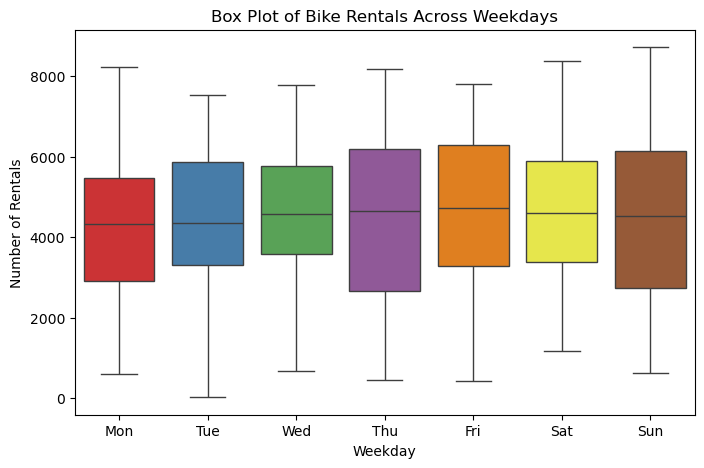

In [57]:
plt.figure(figsize=(8, 5))


sns.boxplot(x='weekday', y='cnt', data=data, hue='weekday', palette='Set1', legend=False)

plt.title('Box Plot of Bike Rentals Across Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Number of Rentals')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


## Pairplot of Temperature,Humidity,Windspeed,Rentals(cnt)

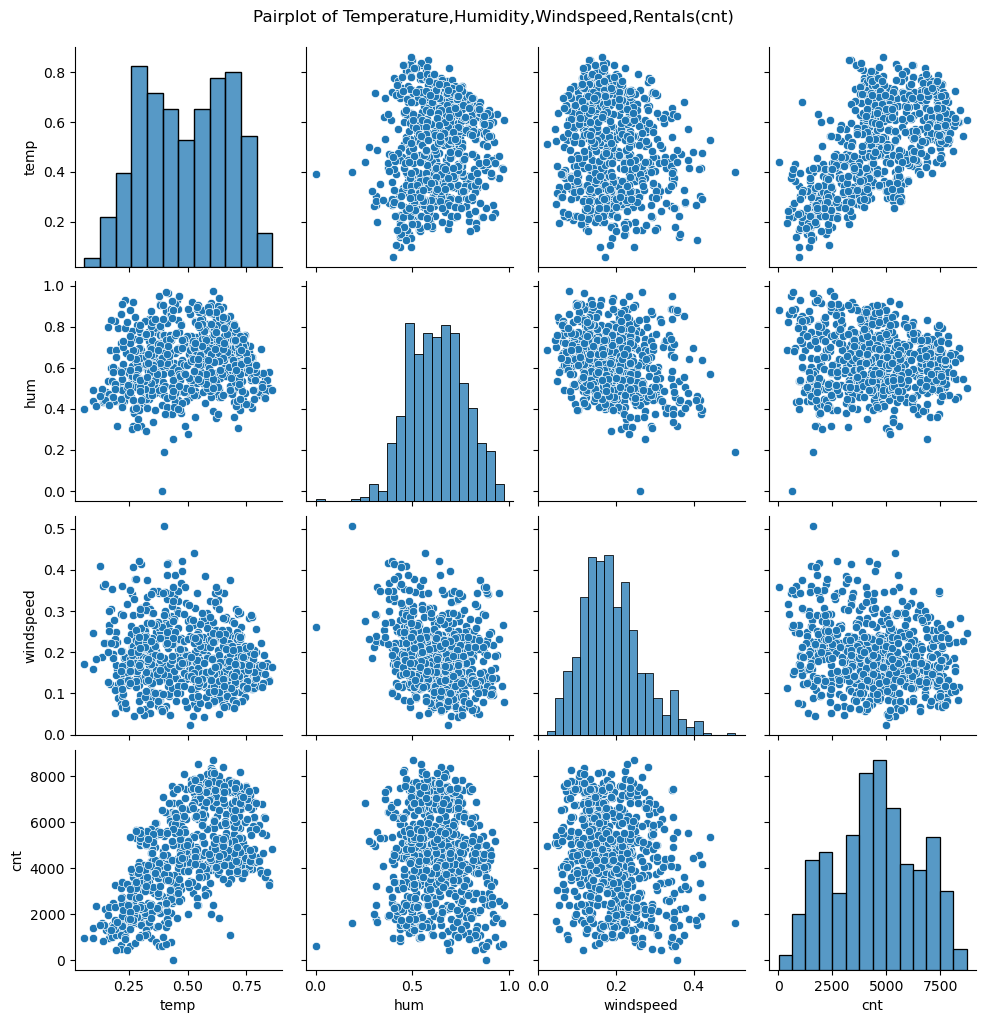

In [59]:
numerical_cols = ['temp', 'hum', 'windspeed', 'cnt']

# Create the pairplot
sns.pairplot(data[numerical_cols], )
plt.suptitle('Pairplot of Temperature,Humidity,Windspeed,Rentals(cnt)', y=1.02)
# Show the plot
plt.show()

## Swarm Plot of Bike Rentals (cnt) by Season

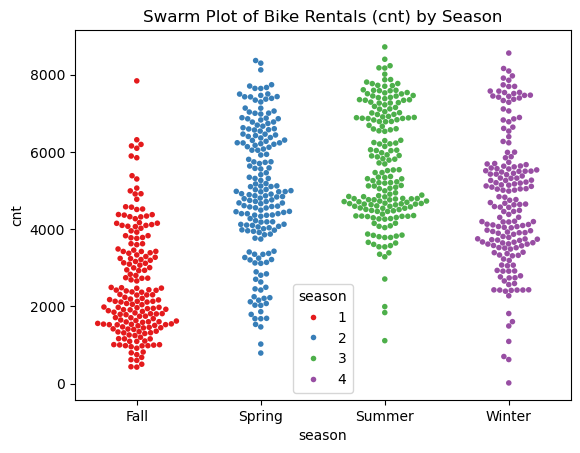

In [61]:
sns.swarmplot(x='season', y='cnt', data=data,hue='season', palette='Set1',size=4)

plt.title('Swarm Plot of Bike Rentals (cnt) by Season')
plt.xticks([0, 1, 2, 3], ['Fall', 'Spring', 'Summer', 'Winter'])

plt.show()

## Show Data Daily wise

In [63]:
daily_data = data.groupby('dteday').agg({
    'cnt': 'sum',        # Total rentals
    'registered': 'sum', # Total registered rentals
    'casual': 'sum',     # Total casual rentals
    'temp': 'mean',      # Average temperature
    'hum': 'mean'        # Average humidity
}).reset_index()


print(daily_data.head())

      dteday   cnt  registered  casual      temp       hum
0 2011-01-01   985         654     331  0.344167  0.805833
1 2011-01-02   801         670     131  0.363478  0.696087
2 2011-01-03  1349        1229     120  0.196364  0.437273
3 2011-01-04  1562        1454     108  0.200000  0.590435
4 2011-01-05  1600        1518      82  0.226957  0.436957


## Distribution of Total Rentals (cnt) with KDE

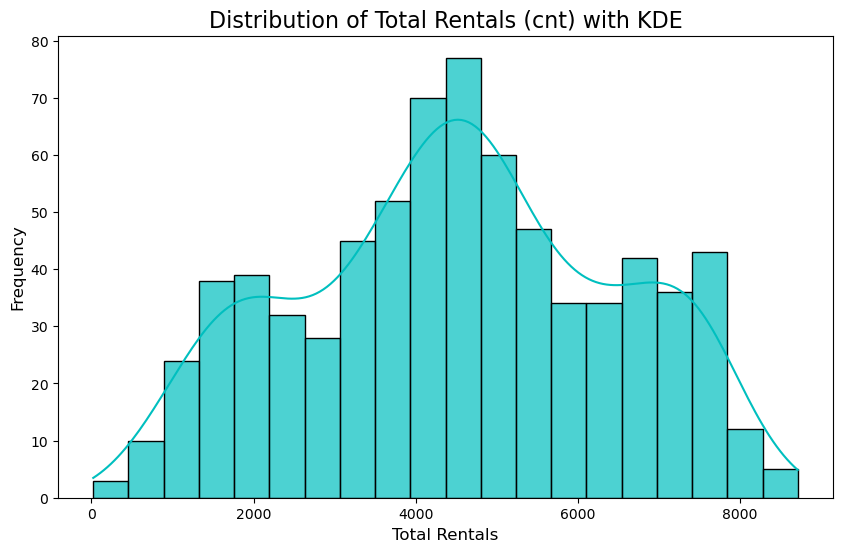

In [65]:
plt.figure(figsize=(10, 6))
c=['#808000']

sns.histplot(data['cnt'], bins=20, kde=True, color='c', edgecolor='black', alpha=0.7)


plt.title('Distribution of Total Rentals (cnt) with KDE', fontsize=16)
plt.xlabel('Total Rentals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

## Registered Users Over Time

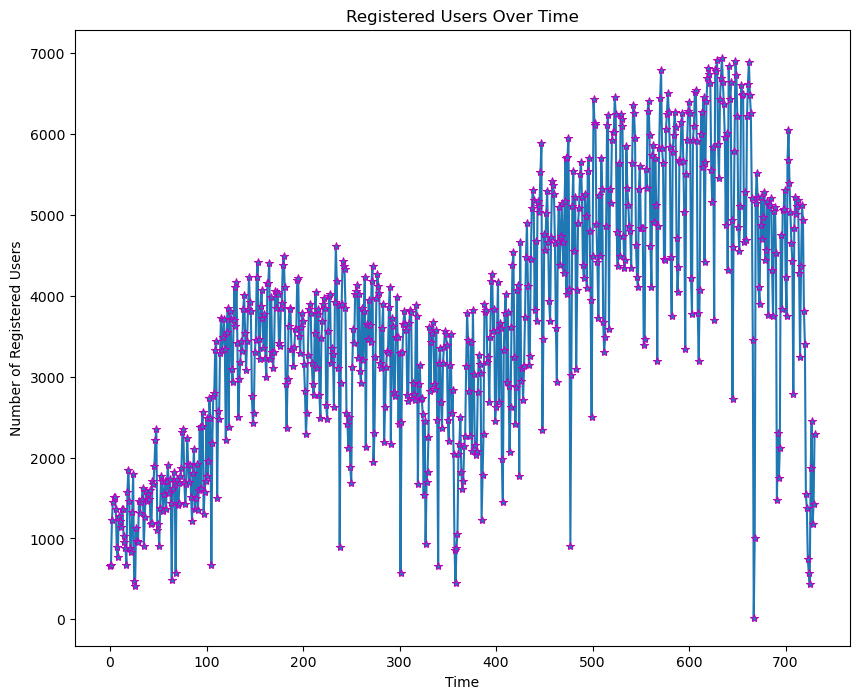

In [67]:
plt.figure(figsize = (10,8))

sns.lineplot(data['registered'], marker = '*', mec = 'm')
plt.title('Registered Users Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Registered Users')
plt.show()